In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def slider_block(L_size, KL, K, Fth):

    i_vals = np.linspace(0, L_size - 1, L_size)
    j_vals = np.linspace(0, L_size - 1, L_size)
    i_vals, j_vals = np.meshgrid(i_vals, j_vals)                # give each block an identity
    
    Fth_min = np.min(Fth)    # Find the smallest one to determine where propagation starts
    i, j = np.unravel_index(np.argmin(Fth), Fth.shape)  # Indices of the minimum coefficient of friction
    print(f"Initial position of minimum friction at i: {i}, j: {j}")

    # include stress of neighbors (distribute stress, initial site resets tot 0)
    # set threshold to 1
    # 1/4 of stress to each of hte 4 neighbors
    # while lenght of queue is non-zero (make sure not at the edge)
    
    X_displacement_initial = Fth_min / KL
    X_displacement = np.zeros((L_size, L_size))

    X_displacement[i, j] += X_displacement_initial
    
    while i > 0:
        while j> 0:
            if i > 0 and i < L_size - 1 and j > 0 and j < L_size - 1:
                Fij = K*(2*X_displacement[i,j] - X_displacement[i-1,j] - X_displacement[i+1,j]) + K*(2*X_displacement[i,j] - X_displacement[i,j-1] - X_displacement[i,j+1]) + (KL * X_displacement[i,j])
    
                X_displacement_new = Fij / K
                X_displacement[i, j] += X_displacement_new
                
                Del_Fj_add = (K / (4*K + KL)) * Fij
                Fij = Fij + Del_Fj_add
                
                j -= 1
        if i > 0 and i < L_size - 1 and j > 0 and j < L_size - 1:
            Fij = K*(2*X_displacement[i,j] - X_displacement[i-1,j] - X_displacement[i+1,j]) + K*(2*X_displacement[i,j] - X_displacement[i,j-1] - X_displacement[i,j+1]) + (KL * X_displacement[i,j])
            
            X_displacement_new = Fij / K
            X_displacement[i, j] += X_displacement_new
            
            Del_Fi_add = (K / (4*K + KL)) * Fij
            Fij = Fij + Del_Fi_add
            
            i -= 1

    while i < L_size - 1:
        while j< L_size - 1:
            if i > 0 and i < L_size - 1 and j > 0 and j < L_size - 1:
                Fij = K*(2*X_displacement[i,j] - X_displacement[i-1,j] - X_displacement[i+1,j]) + K*(2*X_displacement[i,j] - X_displacement[i,j-1] - X_displacement[i,j+1]) + (KL * X_displacement[i,j])
    
                X_displacement_new = Fij / K
                X_displacement[i, j] += X_displacement_new
                
                Del_Fj_add = (K / (4*K + KL)) * Fij
                Fij = Fij + Del_Fj_add
                
                j += 1
                
        if i > 0 and i < L_size - 1 and j > 0 and j < L_size - 1:
            Fij = K*(2*X_displacement[i,j] - X_displacement[i-1,j] - X_displacement[i+1,j]) + K*(2*X_displacement[i,j] - X_displacement[i,j-1] - X_displacement[i,j+1]) + (KL * X_displacement[i,j])
            
            X_displacement_new = Fij / K
            X_displacement[i, j] += X_displacement_new
            
            Del_Fi_add = (K / (4*K + KL)) * Fij
            Fij = Fij + Del_Fi_add
            
            i += 1


    plt.figure(figsize=(8, 6))
    plt.imshow(X_displacement, cmap='viridis', origin='lower', extent=(0, L_size, 0, L_size))
    plt.colorbar(label='X Displacement')
    plt.title("X Displacement Field")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

In [ ]:
L_size = 10       # Define the size of the space
K = 1
KL = 1.5
Fth = 1 + np.random.rand(L_size, L_size)    # define random coefficients of friction (between 1 and 2)

slider_block(L_size, KL, K, Fth)

Initial position of minimum friction at i: 0, j: 4


Starting position at i: 25, j: 42


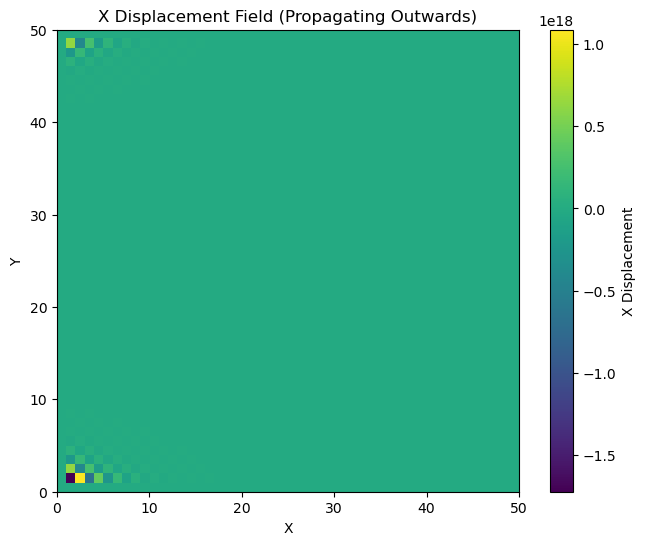

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

L_size = 50  # Define the size of the grid
K = 1
KL = 1.5
Fth = 1 + np.random.rand(L_size, L_size)  # Define random coefficients of friction (between 1 and 2)

def slider_block(L_size, KL, K, Fth):
    X_displacement = np.zeros((L_size, L_size))  # Initialize the displacement grid

    # Find the starting point (i, j) with the minimum coefficient of friction
    i_start, j_start = np.unravel_index(np.argmin(Fth), Fth.shape)
    print(f"Starting position at i: {i_start}, j: {j_start}")
    
    # Initial displacement at the starting point
    X_displacement_initial = Fth[i_start, j_start] / KL
    X_displacement[i_start, j_start] += X_displacement_initial
    
    # Create a queue for BFS, starting with the (i, j) point
    queue = deque([(i_start, j_start)])
    
    # Direction vectors for moving in 4-connected grid (up, down, left, right)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right
    
    # Set to keep track of visited points
    visited = set()
    visited.add((i_start, j_start))

    # Process the queue while it’s not empty
    while queue:
        i, j = queue.popleft()  # Get the next point from the queue
        
        # Calculate the force at the current point (i, j)
        if i > 0 and i < L_size - 1 and j > 0 and j < L_size - 1:
            Fij = K * (2 * X_displacement[i, j] - X_displacement[i-1, j] - X_displacement[i+1, j]) \
                + K * (2 * X_displacement[i, j] - X_displacement[i, j-1] - X_displacement[i, j+1]) \
                + (KL * X_displacement[i, j])
            
            # Update the displacement at (i, j)
            X_displacement_new = Fij / K
            X_displacement[i, j] += X_displacement_new

            # For each neighbor (up, down, left, right)
            for di, dj in directions:
                ni, nj = i + di, j + dj  # Neighbor indices
                # Ensure the neighbor is within bounds and not visited
                if 0 <= ni < L_size and 0 <= nj < L_size and (ni, nj) not in visited:
                    queue.append((ni, nj))
                    visited.add((ni, nj))  # Mark this neighbor as visited

    # Plot the final displacement field
    plt.figure(figsize=(8, 6))
    plt.imshow(X_displacement, cmap='viridis', origin='lower', extent=(0, L_size, 0, L_size))
    plt.colorbar(label='X Displacement')
    plt.title("X Displacement Field (Propagating Outwards)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Run the function
slider_block(L_size, KL, K, Fth)


Starting position at i: 13, j: 11


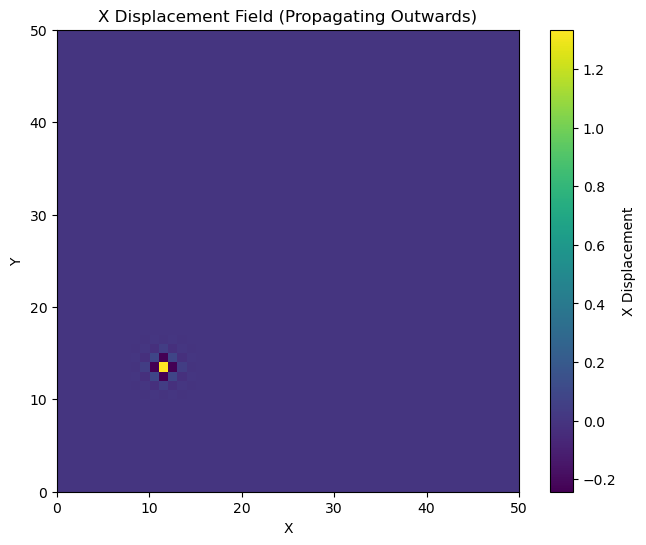

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

L_size = 10  # Define the size of the grid
K = 1
KL = 1.5
Fth = 1 + np.random.rand(L_size, L_size)  # Define random coefficients of friction (between 1 and 2)

def slider_block(L_size, KL, K, Fth):
    X_displacement = np.zeros((L_size, L_size))  # Initialize the displacement grid

    # Find the starting point (i, j) with the minimum coefficient of friction
    i_start, j_start = np.unravel_index(np.argmin(Fth), Fth.shape)
    print(f"Starting position at i: {i_start}, j: {j_start}")
    
    # Initial displacement at the starting point
    X_displacement_initial = Fth[i_start, j_start] / KL
    X_displacement[i_start, j_start] = X_displacement_initial
    
    # Create a queue for BFS, starting with the (i, j) point
    queue = deque([(i_start, j_start)])
    
    # Direction vectors for moving in 4-connected grid (up, down, left, right)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right
    
    # Set to keep track of visited points
    visited = set()
    visited.add((i_start, j_start))

    # Process the queue while it’s not empty
    while queue:
        i, j = queue.popleft()  # Get the next point from the queue
        
        # Calculate the force at the current point (i, j)
        if 0 < i < L_size - 1 and 0 < j < L_size - 1:  # Ensure valid indices
            Fij = K * (2 * X_displacement[i, j] - X_displacement[i-1, j] - X_displacement[i+1, j]) \
                + K * (2 * X_displacement[i, j] - X_displacement[i, j-1] - X_displacement[i, j+1]) \
                + (KL * X_displacement[i, j])
            
            # Normalize the force calculation to prevent extreme growth
            Fij = Fij / (4 * K + KL)

            # Update the displacement at (i, j)
            X_displacement_new = Fij / K
            X_displacement_new = np.clip(X_displacement_new, -2, 2)  # Clamp values between -2 and 2
            X_displacement[i, j] += X_displacement_new

            # For each neighbor (up, down, left, right)
            for di, dj in directions:
                ni, nj = i + di, j + dj  # Neighbor indices
                # Ensure the neighbor is within bounds and not visited
                if 0 <= ni < L_size and 0 <= nj < L_size and (ni, nj) not in visited:
                    queue.append((ni, nj))
                    visited.add((ni, nj))  # Mark this neighbor as visited

    # Plot the final displacement field
    plt.figure(figsize=(8, 6))
    plt.imshow(X_displacement, cmap='viridis', origin='lower', extent=(0, L_size, 0, L_size))
    plt.colorbar(label='X Displacement')
    plt.title("X Displacement Field (Propagating Outwards)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Run the function
slider_block(L_size, KL, K, Fth)
